## Import Statements

In [104]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Contents:
- [Yelp Data](#Yelp-Data)
- [Zillow Data](#Zillow-Data)
- [Combined Data](#Combined-Data)
- [Basic Features](#Basic-Features)
- [Advanced Features](#Advanced-Features)

## Yelp Data

|Feature|Type|Description|
|---|---|---|
|postal_code|int|business zip codes|
|categories|object|categories under which businesses fall|
|is_open|float|whether or not businesses are still open|
|latitude|float|latitudes of all businesses|
|longitude|float|longitudes of all businesses|
|review_count|int|number of yelp reviews each business received|
|stars|float|average number of star ratings each business received|

In [105]:
# importing yelp data
df = pd.read_json('../project-client_project/yelp_academic_dataset_business.json', lines = True)

df.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC


In [106]:
# checking shape
df.shape

(188593, 15)

In [107]:
df.groupby('state').count()['postal_code'].sort_values(ascending = False).head(12)

state
AZ     56495
NV     35688
ON     32393
NC     14359
OH     13664
PA     10966
QC      8756
AB      7670
WI      5042
IL      1937
SC       770
NYK      163
Name: postal_code, dtype: int64

In [108]:
df = df[(df['state'] == 'AZ')|(df['state']== 'NV')|(df['state']=='NC')|(df['state'] =="OH")|(df['state']=='PA')|(df['state']=='WI')]#|(df['state']=='SC')|(df['state']=='IL')]


In [109]:
df.shape

(136214, 15)

In [110]:
# checking number of missing values
df.isnull().sum()

address             0
attributes      19064
business_id         0
categories        410
city                0
hours           30097
is_open             0
latitude            4
longitude           4
name                0
neighborhood        0
postal_code         0
review_count        0
stars               0
state               0
dtype: int64

In [111]:
# dropping unnecessary columns
df = df.drop(['address', 'city'], axis=1)

# dropping columns that are suspected of being poor predictors and have many missing values 
df = df.drop(['attributes', 'hours', 'neighborhood'], axis=1)

#explore attributes lateabsr

In [112]:
# instantiating count vectorizer
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None) 

# applying count vectorizer to yelp categories column
df['categories'] = df['categories'].fillna('missing')
cat_vector = vectorizer.fit_transform(df['categories']).toarray()

# merging results with original yelp data frame
cat_vector_df = pd.DataFrame(cat_vector, columns = vectorizer.get_feature_names())
df = pd.merge(left = df, right = cat_vector_df, on=df.index).drop('key_0', axis=1)

In [113]:
df.isnull().sum()[df.isnull().sum()>0]

latitude     4
longitude    4
dtype: int64

In [114]:
df = df.dropna()

In [115]:
df.head()

,business_id,categories,is_open,latitude,longitude,name,postal_code,review_count,stars,state,...,women,workers,wraps,yelp,yoga,yogurt,your,yourself,ziplining,zoos
0,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",0,35.960734,-114.939821,CK'S BBQ & Catering,89002,3,4.5,NV,...,0,0,0,0,0,0,0,0,0,0
1,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",1,33.449999,-112.076979,Geico Insurance,85003,8,1.5,AZ,...,0,0,0,0,0,0,0,0,0,0
2,45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,85024,63,4.0,AZ,...,0,0,0,0,0,0,0,0,0,0
3,8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",1,33.448106,-112.341302,Filiberto's Mexican Food,85323,40,2.5,AZ,...,0,0,0,0,0,0,0,0,0,0
4,UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",1,40.441421,-79.956457,Maggie & Stella's Gifts,15213,3,3.5,PA,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#drop unnecessary columns
df = df.drop(['business_id', 'categories'], axis=1)

In [117]:
# checking first three rows after count vectorizer operation
df.head(3)

,is_open,latitude,longitude,name,postal_code,review_count,stars,state,3d,abatement,...,women,workers,wraps,yelp,yoga,yogurt,your,yourself,ziplining,zoos
0,0,35.960734,-114.939821,CK'S BBQ & Catering,89002,3,4.5,NV,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,33.449999,-112.076979,Geico Insurance,85003,8,1.5,AZ,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,85024,63,4.0,AZ,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
#### Combining the data

In [119]:
df['total'] = 1
yelp_df = df.groupby('postal_code').sum()
yelp_df.head()

,is_open,latitude,longitude,review_count,stars,3d,abatement,acai,accessories,accountants,...,workers,wraps,yelp,yoga,yogurt,your,yourself,ziplining,zoos,total
postal_code,,,,,,,,,,,,,,,,,,,,,
,371,14514.917699,-43502.208616,4273,1474.5,0,0,0,0,0,...,0,1,2,0,2,0,0,0,0,410
06280,1,36.166228,-115.192580,3,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
08054,1,39.980331,-74.858983,5,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10300,1,36.160569,-115.320885,3,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15003,37,1623.793452,-3209.068869,456,158.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40


In [120]:
yelp_df['postal_code'] = yelp_df.index
yelp_df = yelp_df.reset_index(drop = True)

In [121]:
yelp_df = yelp_df.drop(0)
yelp_df['postal_code'] = yelp_df['postal_code'].astype(int)
yelp_df[['postal_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 1 to 825
Data columns (total 1 columns):
postal_code    825 non-null int64
dtypes: int64(1)
memory usage: 12.9 KB


In [122]:
df.to_csv('saved_df.csv', index=False)

#### NOTE: Latitude and longitude can be used to determine missing postal codes. For now, these missing values will simply be dropped. (This can later be undone without breaking the code that follows).

# Zillow Data

|Feature|Type|Description|
|---|---|---|
|regionname|object|region zip codes|
|state|object|states to which zip codes belong|
|price_per_sqft|int|median home values per sq ft of each region|

In [123]:
# importing zillow data
zillow_df_sqft = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv', encoding='windows-1252')
zillow_df_national = pd.read_csv('Zip_Zhvi_Summary_AllHomes.csv', encoding='windows-1252')

In [124]:
zillow_df_sqft.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,199.0,199.0,200.0,...,1331,1332,1338,1346,1346,1340,1334,1329,1320,1312
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,155.0,156.0,156.0,...,474,477,477,477,477,477,477,478,478,479
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,353.0,355.0,356.0,...,1646,1638,1645,1655,1650,1632,1615,1602,1588,1579


In [125]:
zillow_df_national.head(3)

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2018-11-30,61639,10025,NY,New York-Newark-Jersey City,New York County,New York,0,1064000,-0.007648,-0.021069,-0.063380,NaN,NaN,2017-12,2017-Q4,1138900,-0.065765,2017-03
1,2018-11-30,84654,60657,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1,354000,0.007112,0.016657,0.019292,NaN,NaN,2018-11,2018-Q4,354000,0.000000,2018-11
2,2018-11-30,61637,10023,NY,New York-Newark-Jersey City,New York County,New York,2,1380100,-0.007051,-0.040798,-0.131958,NaN,NaN,2016-12,2016-Q4,1619900,-0.148034,2013-11


#### NOTE: Yelp Data was taken from https://www.kaggle.com/yelp-dataset/yelp-dataset which was last updated on Aug 02, 2018. It will be assumed that this best corresponds to Zillow Data from July, 2018.

In [126]:
# reducing zillow data frames to columns of interest
zillow_df_sqft = zillow_df_sqft[['RegionName','2018-07','State']]
zillow_df_national = zillow_df_national[['RegionName','Zhvi']]

In [127]:
# lowercasing column names
zillow_df_sqft.columns = map(str.lower, zillow_df_sqft.columns)
zillow_df_national.columns = map(str.lower, zillow_df_national.columns)
# renaming target column
zillow_df_sqft.rename({'2018-07': 'price_per_sqft'}, axis=1, inplace=True)
zillow_df_national.rename({'zhvi': 'price'}, axis=1, inplace=True)

In [128]:
zillow_df = pd.merge(left=zillow_df_sqft, right=zillow_df_national, left_on='regionname', right_on='regionname')

In [129]:
zillow_df.head(3)

,regionname,price_per_sqft,state,price
0,10025,1340,NY,1064000
1,60657,477,IL,354000
2,10023,1632,NY,1380100


In [130]:
zillow_df = zillow_df[['regionname','price_per_sqft','state','price']]
zillow_df.head(3)

,regionname,price_per_sqft,state,price
0,10025,1340,NY,1064000
1,60657,477,IL,354000
2,10023,1632,NY,1380100


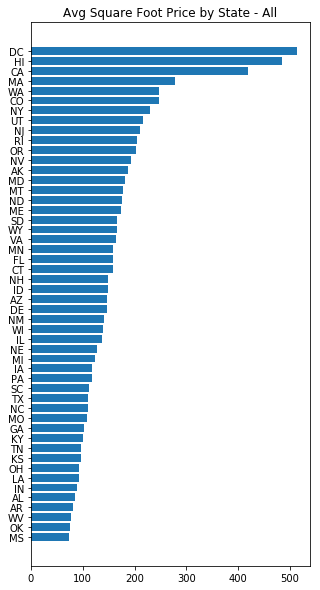

In [131]:
plt.figure(figsize=(5,10))
plt.barh(zillow_df.groupby('state').mean()['price_per_sqft'].sort_values().index, zillow_df.groupby('state').mean()['price_per_sqft'].sort_values())
plt.title('Avg Square Foot Price by State - All');

In [132]:
zillow_df.groupby('state').mean()['price_per_sqft'].describe()

count     50.000000
mean     166.205246
std       92.799310
min       72.481752
25%      108.959880
50%      147.674705
75%      185.541217
max      512.809524
Name: price_per_sqft, dtype: float64

#### NOTE: The following code block appears to suggest that typos exist in Yelp data. In the interest of moving forward, rows containing these typos will be removed. (Again, this can later be undone without breaking the code that follows).

## Combined Data

In [133]:
# merging yelp and zillow data, leaving data for individual businesses

combined_df = pd.merge(yelp_df, zillow_df, left_on='postal_code', right_on='regionname').drop(['regionname'], axis=1)


In [134]:
combined_df.shape

(489, 1366)

In [135]:
combined_df[combined_df['total']>=10].shape

(378, 1366)

In [136]:
final_df = combined_df[combined_df['total']>=10]

## Basic Features

In [137]:
# mean stars, mean_review_count, percent_open

final_df['stars_mean'] = final_df['stars']/final_df['total']
final_df['mean_review_count'] = final_df['review_count']/final_df['total']
final_df['percent_is_open'] = final_df['is_open']/final_df['total']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [138]:
final_df.head(3)

,is_open,latitude,longitude,review_count,stars,3d,abatement,acai,accessories,accountants,...,ziplining,zoos,total,postal_code,price_per_sqft,state,price,stars_mean,mean_review_count,percent_is_open
2,37,1623.793452,-3209.068869,456,158.0,0,0,0,0,0,...,0,0,40,15003,65,PA,78800,3.950000,11.400000,0.925000
6,158,7265.418314,-14419.537822,3056,622.5,0,0,0,1,0,...,0,0,180,15017,125,PA,172200,3.458333,16.977778,0.877778
7,23,1094.787345,-2155.131919,160,96.0,0,0,0,0,0,...,0,0,27,15024,114,PA,152700,3.555556,5.925926,0.851852


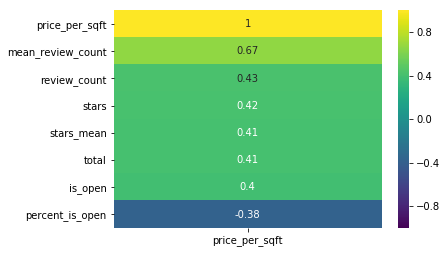

In [139]:
heatmap_features = ['price_per_sqft', 'is_open', 'review_count', 'stars', 'total', 'stars_mean','mean_review_count', 'percent_is_open']
sns.heatmap(final_df[heatmap_features].corr()[['price_per_sqft']].sort_values(by='price_per_sqft', ascending=False), vmin=-1, vmax=1, cmap='viridis', annot=True)

# Advanced-Features

In [140]:
df = df[df['postal_code']!='']
df['postal_code'] = df['postal_code'].astype(int)

In [141]:
# Get Inertia Scores
from sklearn.cluster import KMeans

km_inertia = pd.DataFrame(columns=['inertia_scores'], index=final_df['postal_code'])
km = KMeans(n_clusters=1, random_state=42)
for postal_code in final_df['postal_code']:
    temp_df = df[df['postal_code'] == postal_code][['latitude','longitude']].copy()
    km.fit(temp_df)
    km_inertia.loc[postal_code, 'inertia_scores'] = km.inertia_

km_inertia.reset_index()
final_df = final_df.merge(km_inertia, on='postal_code')

In [142]:
final_df.to_csv('grid_df.csv', index = False)

In [143]:
# import packages for manual grid search
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

In [144]:
# long loading time, so hopefully won't have to import data again 
try: 
    grid_df = final_df
except:
    grid_df = pd.read_csv('grid_df.csv')
try:
    grid2_df = df
except:
    grid2_df = pd.read_csv('saved_df.csv')

In [145]:
# removing count vectors for faster grid search
grid_df = grid_df[['postal_code', 'price_per_sqft', 'is_open', 'review_count', 'stars', 'total', 'stars_mean', 'mean_review_count', 'percent_is_open', 'inertia_scores']]

In [146]:
# manually grid search DBScan for number of clusters
pipe = Pipeline([
                ('pf', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('lcv', LassoCV(max_iter=1000000, cv=3))
                ])

grid_searched_DBScan_params = pd.DataFrame(columns=['eps', 'min_samples', 'correlation', 'train_score', 'test_score'], index=range(0, 5))
grid_searched_DBScan_params['eps'] = 0.002
counter = 0
eps = 0.002
for min_samples in range(10, 60, 10):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db_num = pd.DataFrame(columns=['num_clusters'], index=grid_df['postal_code'])
    for postal_code in grid_df['postal_code']:
        temp_df = grid2_df[grid2_df['postal_code'] == postal_code][['latitude','longitude']].copy()
        model = db.fit(temp_df[['latitude', 'longitude']])
        db_num.loc[postal_code, 'num_clusters'] = len(set(model.labels_)) - 1
    
    db_num.reset_index(inplace=True)
    grid_df = grid_df.merge(db_num, on='postal_code')

    # correlation / pipeline lasso as metric
    
    grid_searched_DBScan_params.loc[counter, 'min_samples'] = min_samples   
        
    X = grid_df.drop(['price_per_sqft'], axis=1)
    y = grid_df['price_per_sqft']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    pipe.fit(X_train, y_train)
    grid_searched_DBScan_params.loc[counter, 'correlation'] = grid_df[['num_clusters', 'price_per_sqft']].corr().iloc[0, 1]
    grid_searched_DBScan_params.loc[counter, 'train_score'] = round(pipe.score(X_train, y_train), 5)
    grid_searched_DBScan_params.loc[counter, 'test_score'] = round(pipe.score(X_test, y_test), 5)
            
    counter += 1
        
    grid_df.drop('num_clusters', axis=1, inplace=True)

In [147]:
grid_searched_DBScan_params

,eps,min_samples,correlation,train_score,test_score
0,0.002,10,0.238531,0.61558,0.46251
1,0.002,20,0.325427,0.6009,0.46562
2,0.002,30,0.352071,0.63136,0.47918
3,0.002,40,0.373147,0.63715,0.46429
4,0.002,50,0.32825,0.64074,0.45972


In [148]:
# Get Number of Clusters (these parameters can be tuned)
from sklearn.cluster import DBSCAN

db_num = pd.DataFrame(columns=['num_clusters'], index=final_df['postal_code'])
db = DBSCAN(eps=0.002, min_samples=30)
for postal_code in final_df['postal_code']:
    temp_df = df[df['postal_code'] == postal_code][['latitude','longitude']].copy()
    model = db.fit(temp_df[['latitude', 'longitude']])
    db_num.loc[postal_code, 'num_clusters'] = len(set(model.labels_)) - 1
    
final_df = final_df.merge(db_num, on='postal_code')

In [149]:
# for unsupervised EDA
final_df.to_csv('saved_final_df.csv')

In [150]:
final_df = final_df.drop(columns = ['latitude', 'longitude','postal_code'])

In [151]:
final_df.to_csv('cleaned_data.csv', index = False)